# Laboratorio 10
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.fftpack import fft # modulo para calcular la transformada de fourier
import scipy.signal as signal
from scipy.io.wavfile import read
import scipy.signal as sp

#**1.1**
 Diseñe una señal sinusoidal cuya frecuencia incremente en funcion del tiempo de forma cuadrática, con frecuencia de muestreo fs = 5kHz. Grafique y escuche la señal

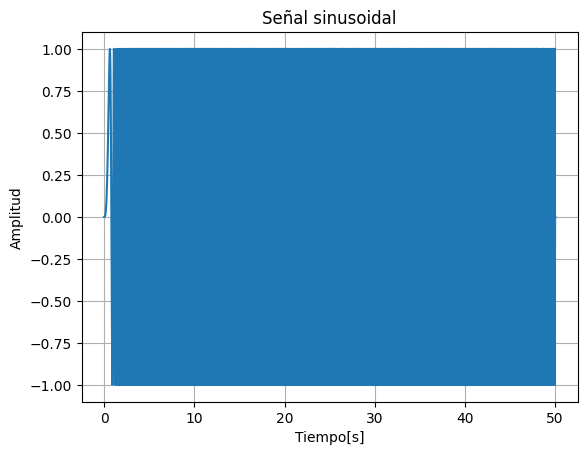

In [3]:
fs = 5000  #Frecuencia de muestreo
t = np.arange(0,50,1.0/fs)  #Vector de tiempo
f = t**2
x = np.sin(2*np.pi*f*t)  #Funcion senoidal usada con "tiempo cuadratico"


plt.plot(t,x)
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal")
plt.grid()
plt.show()
Audio(x,rate=fs)

¿Qué se puede decir acerca del audio?:Se escucha un sonido parecido a el de una sirena,pero muy lento,empieza en un sonido grave que va aumentando gradualmente hasta un tope muy agudo y luego empieza a bajar otra vez,para repetirse

#**1.2**
Usando subplots grafique la señal antes y después de aplicar un filtro IIR pasa-bajas, pasa-altas, pasa-bandas y rechaza-bandas. Escoja frecuencias de corte que permitan filtrar minimamente la mitad de la señal.

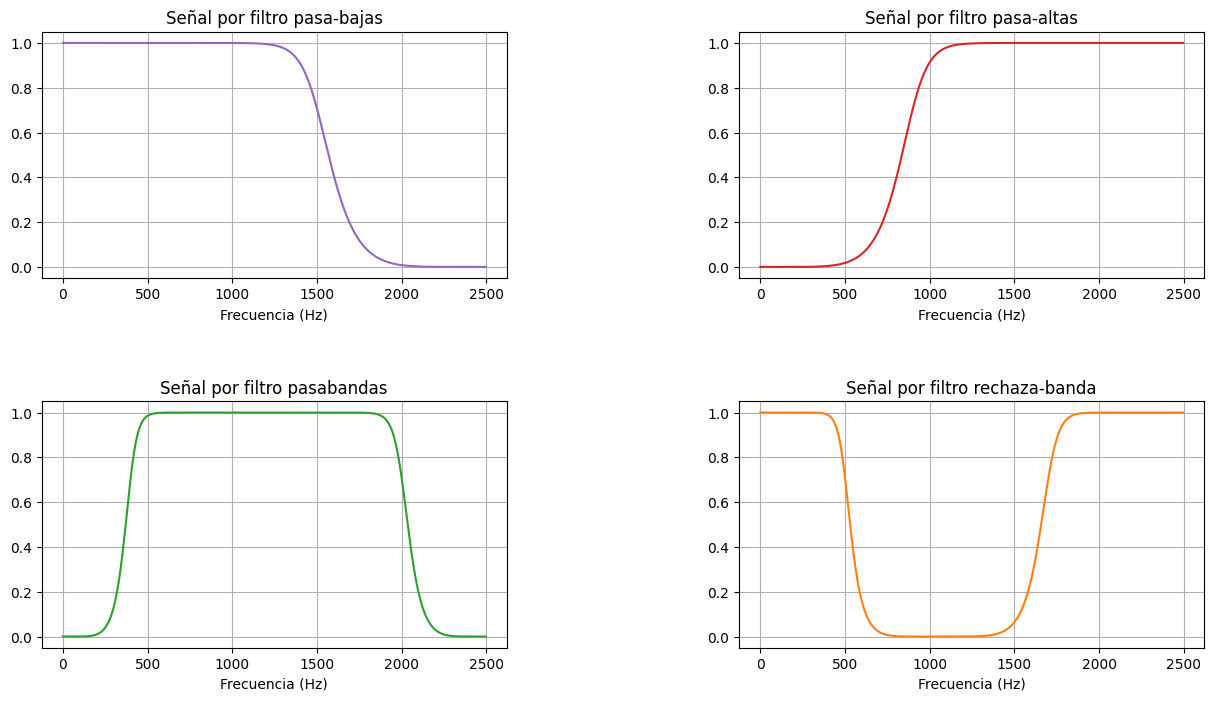

In [9]:
## Filtro pasa bajas
fc_pb = 1500
Wn_pb = fc_pb/(fs/2)
b, a = sp.butter(6, Wn_pb, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a);
y_low = sp.lfilter(b, a, x)

## Filtro pasa altas
fc_pa = 900
Wn_pa = fc_pa/(fs/2)
b, a = sp.butter(6, Wn_pa, btype='highpass', analog=False, output='ba', fs=None)
wba, Hba = sp.freqz(b, a);
y_high = sp.lfilter(b, a, x)

## Filtro pasa banda
Wn_ps = [400/2500, 2000/2500]
b, a = sp.butter(6, Wn_ps, btype='bandpass', analog=False, output='ba', fs=None)
wbs, Hbs = sp.freqz(b, a);
y_bandp = sp.lfilter(b, a, x)

## Filtro rechaza-banda
Wn_pr = [500/2500, 1700/2500]
b, a = sp.butter(6, Wn_pr, btype='bandstop', analog=False, output='ba', fs=None)
wbr, Hbr = sp.freqz(b, a);
y_bands = sp.lfilter(b, a, x)


fig, axs = plt.subplots(2,2,figsize=(15,8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axs[0, 0].plot((wb*fs)/(2*np.pi), np.abs(Hb),'tab:purple')
axs[0, 0].set_title('Señal por filtro pasa-bajas')
axs[0, 0].set_xlabel('Frecuencia (Hz)')
axs[0, 0].grid(True)

axs[0, 1].plot((wba*fs)/(2*np.pi), np.abs(Hba),'tab:red' )
axs[0, 1].set_title('Señal por filtro pasa-altas')
axs[0, 1].set_xlabel('Frecuencia (Hz)')
axs[0, 1].grid(True)

axs[1, 0].plot((wbs*fs)/(2*np.pi), np.abs(Hbs), 'tab:green')
axs[1, 0].set_title('Señal por filtro pasabandas')
axs[1, 0].set_xlabel('Frecuencia (Hz)')
axs[1, 0].grid(True)

axs[1, 1].plot((wbr*fs)/(2*np.pi), np.abs(Hbr), 'tab:orange')
axs[1, 1].set_title('Señal por filtro rechaza-banda')
axs[1, 1].set_xlabel('Frecuencia (Hz)')
axs[1, 1].grid(True)

**Gaaficas despues del filtro**

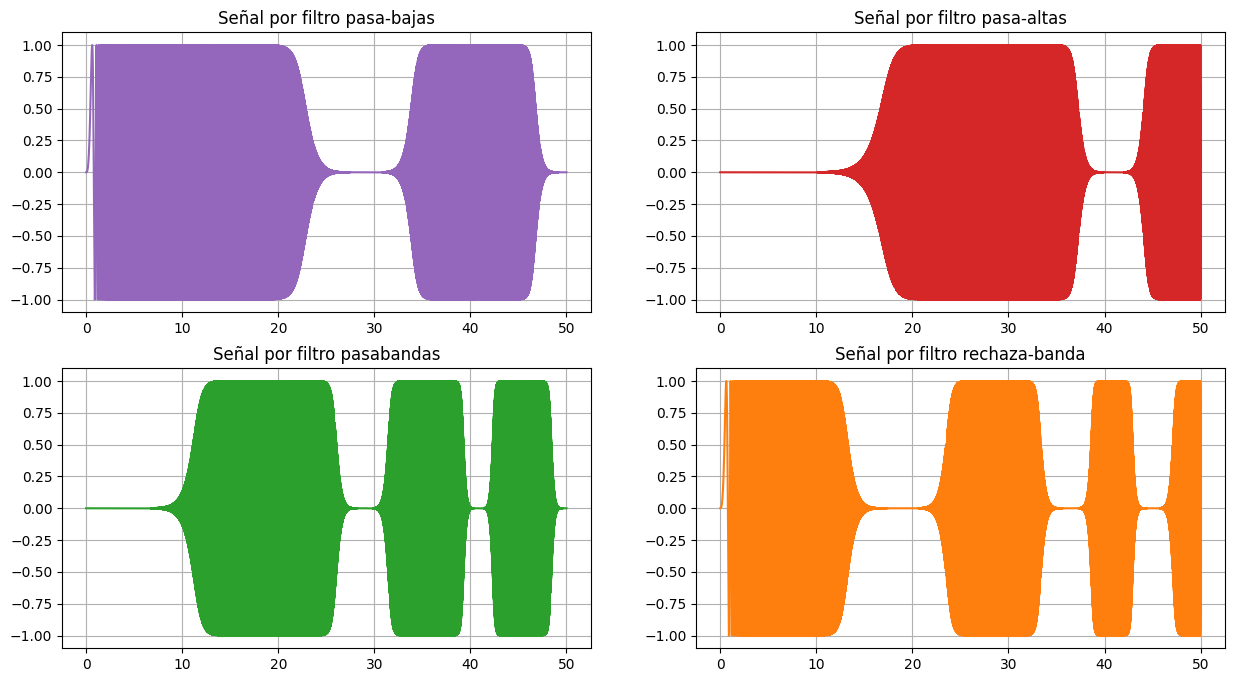

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
axs[0, 0].plot(t, y_low,'tab:purple')
axs[0, 0].set_title('Señal por filtro pasa-bajas')
axs[0, 0].grid(True)

axs[0, 1].plot(t, y_high,'tab:red' )
axs[0, 1].set_title('Señal por filtro pasa-altas')
axs[0, 1].grid(True)

axs[1, 0].plot(t, y_bandp, 'tab:green')
axs[1, 0].set_title('Señal por filtro pasabandas')
axs[1, 0].grid(True)

axs[1, 1].plot(t, y_bands, 'tab:orange')
axs[1, 1].set_title('Señal por filtro rechaza-banda')
axs[1, 1].grid(True)

##**2) Filtrado de música con filtros IIR**

**2.1** Escriba un programa que grafique la señal correspondiente al ultimo numero de su cédula. Recuerde, normalizar la señal en amplitud, eliminar su nivel DC y crear su vector de tiempo dependiendo de su fs

Fs : 44100


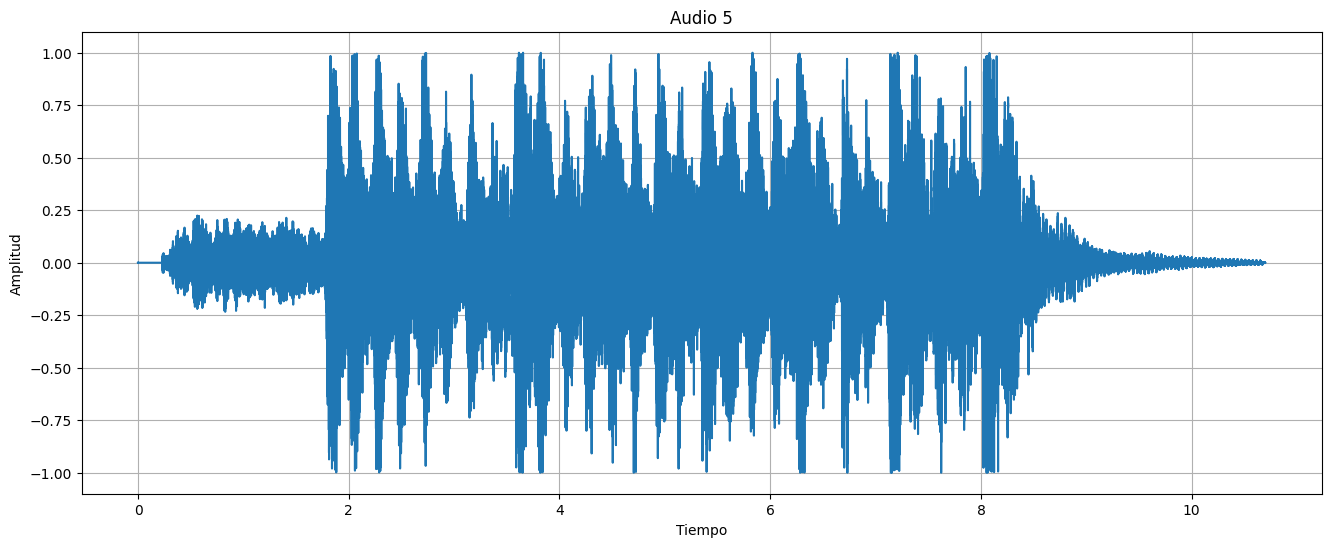

In [12]:
file_audio=('audio3.wav') # Se selecciona el archivo a abrir.
fs, audio=read(file_audio) # Se extrae la Fs y el contenido del audio.
norm = audio/max(abs(audio)) # Se normaliza el audio

print("Fs : {}".format(fs))
t=np.arange(0,len(norm)/fs,1.0/fs)

plt.figure(figsize=(16,6))
plt.plot(t,norm)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Audio 5")
plt.grid()
plt.show()
Audio(norm, rate=fs)

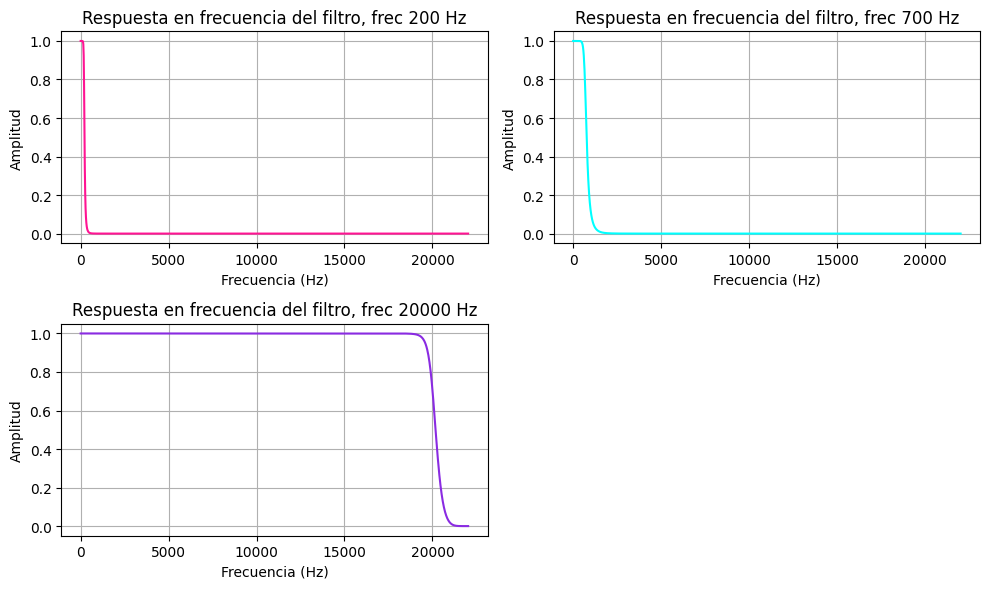

In [13]:
# Normalizar la frecuencia de corte respecto a la mitad de la frecuencia de muestreo
wc1 = 200/(fs/2)
wc2 = 700/(fs/2)
wc3 = 20000/(fs/2)

# Diseñar filtro pasa-bajas
b1, a1 = sp.butter(6, wc1)
b2, a2 = sp.butter(6, wc2)
b3, a3 = sp.butter(6, wc3)

# Calcular respuesta en frecuencia del filtro
wb1, Hb1 = sp.freqz(b1, a1, 1024)
wb2, Hb2 = sp.freqz(b2, a2, 1024)
wb3, Hb3 = sp.freqz(b3, a3, 1024)

# Graficar respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot((wb1*fs)/(2*np.pi), np.abs(Hb1), label='200 Hz', color = 'deeppink')
plt.title('Respuesta en frecuencia del filtro, frec 200 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot((wb2*fs)/(2*np.pi), np.abs(Hb2), label='700 Hz', color = 'cyan')
plt.title('Respuesta en frecuencia del filtro, frec 700 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot((wb3*fs)/(2*np.pi), np.abs(Hb3), label='20000 Hz', color = 'blueviolet')
plt.title('Respuesta en frecuencia del filtro, frec 20000 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()
plt.show()

**2.3** Pase la señal de audio por el filtro diseñado, y escúchela.

In [14]:
# Aplicar filtro pasa-bajas
y1 = sp.lfilter(b1, a1, norm)
y2 = sp.lfilter(b2, a2, norm)
y3 = sp.lfilter(b3, a3, norm)

# Escuchar señal original y filtrada
print('Señal original:')
Audio(norm, rate=fs)

Señal original:


In [15]:
print('Señal filtrada a 200 Hz:')
Audio(y1, rate=fs)

Señal filtrada a 200 Hz:


In [16]:
print('Señal filtrada a 700 Hz:')
Audio(y2, rate=fs)

Señal filtrada a 700 Hz:


In [17]:
print('Señal filtrada a 20000 Hz:')
Audio(y3, rate=fs)

Señal filtrada a 20000 Hz:


**2.4** ¿Qué instrumentos o tipo de sonidos logra escuchar en el audio filtrado? ¿Fue posible separar algunos instrumentos? ¿Porque se filtraron algunos instrumentos?


En el audio de 200 Hz se logran escuchar los bajos  pesar de ser un audio muy agudo

En el audio de 700 Hz se escucha la melodia del piano y los bajos del filtro anterior

En el audio de 20000 Hz se logra escuchar el audio como si fuera el original


Se filtran algunos instrumentos porque le estamos aplicando un filtro pasabajas, donde las frecuencias altas las atenuan y las frecuencias bajas la resaltan y no todos los instrumentos tienen la misma frecuencia


**2.5.** Ahora genere 2 filtros pasa-bajas con una frecuencia de corte de 700Hz y con diferente Roll-off que el trabajado en items anteriores. Grafique la respuesta en frecuencia de ambos filtros usando un subplot.

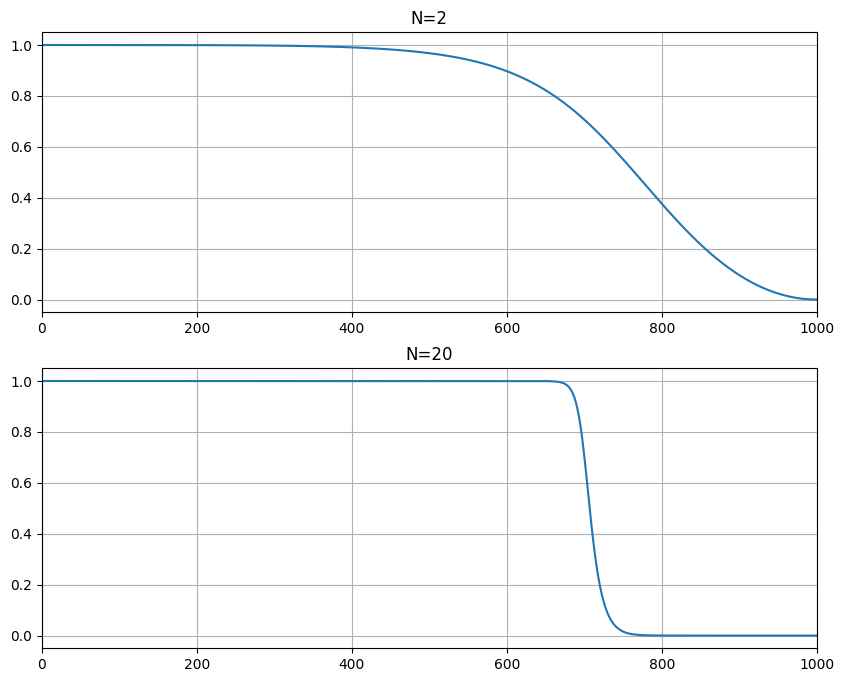

In [35]:
N=[2,20]
plt.figure(figsize=(10,8))
nyquist_rate=fs/2
wc=700/nyquist_rate
for i in range(2):
    b, a = sp.butter(N[i], wc, btype='lowpass')
    wb, Hb = sp.freqz(b, a, 1024);
    plt.subplot(2,1,i+1)
    plt.plot((wb*fs)/(2*np.pi), np.abs(Hb))
    plt.title(f'N={N[i]}')
    plt.xlim(0, 1000)
    plt.grid()

Es posible cambiar el roll-off modificando el orden N del filtro. Los valores se modificaron a 2 y 8. Al aumentar el orden del filtro disminuye el Roll-off, para valores mas bajos en el orden del filtro aumenta el Roll-off.

utilizando los mismos parámetros del  ́ıtem anterior, diseñe un filtro FIR y a través de un subplot
grafique la respuesta en frecuencia de ambos filtros (FIR vs. IIR). ¿Qué diferencias encuentra? ¿Existe alguna
diferencia de un filtro respecto a otro? Explique.

FILTRO FIRR

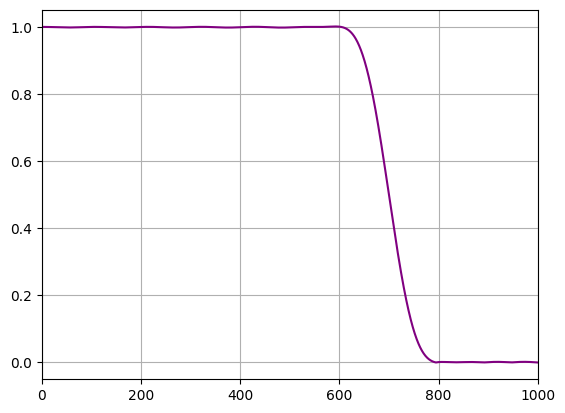

In [33]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs / 2.0
roll_off = 200
cutoff_hz = 700.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N,_= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero='lowpass')
w, h = freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h),color='purple')
plt.xlim([0, 1000])
plt.grid()
plt.show()


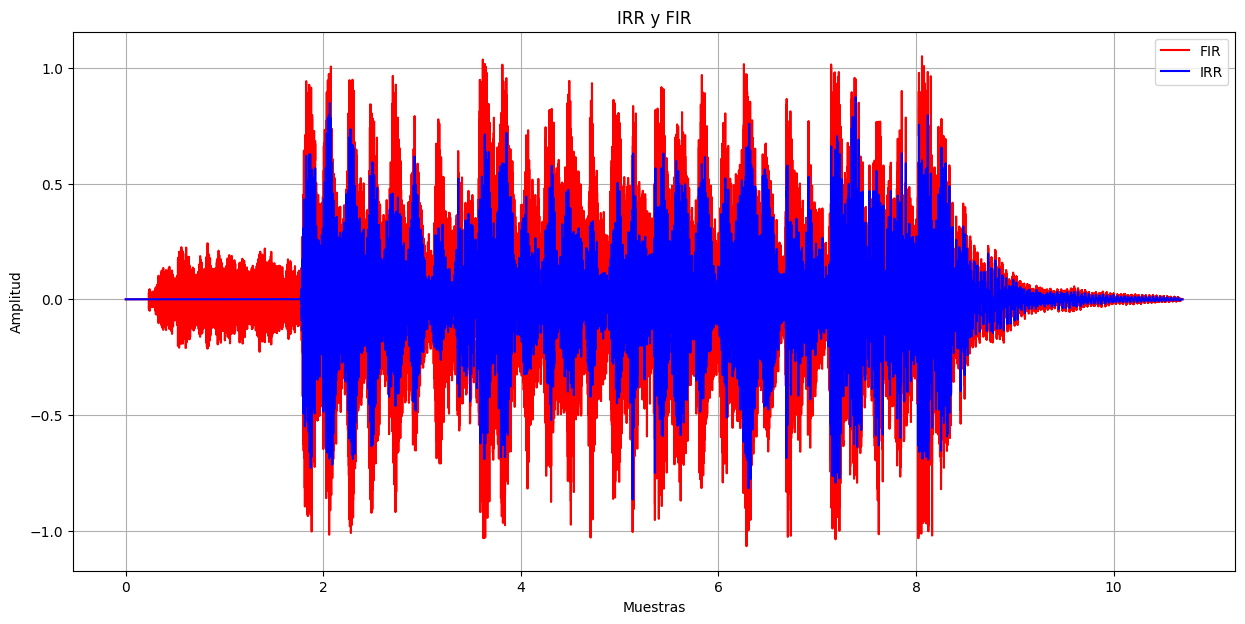

In [42]:
filtered_x = lfilter(taps, 1.0, norm)
plt.figure(figsize=(15,7))
#plt.plot(t,filtered_x)  #graficacion


plt.plot(t,filtered_x, color='red', label='FIR')
plt.plot(t,y2, color='blue', label='IRR')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('IRR y FIR')
plt.grid()
plt.show()




diferencias encuentra? el filtro FIr tiene una mayor amplitud respecto al IRR
¿Existe alguna
diferencia de un filtro respecto a otro? si

## Conclusiones

* En el filtro pasa-bajas se puede confundir con un pasa-bandas si se utiliza una frecuencia de muestreo menor a la de Nyquist, se debe tener en cuenta que para tener una seno bien representada hay que tener minimo 10 veces la frecuencia de la señal.Esto se puede solucionar aumentando la frecuencia de muestreo.


* Se debe tener en cuenta el orden del filtro porque si es un orden muy grande se puede convertir en filtro inestable

* La gran diferencia que existe entre un filtro FIR con respecto a un IIR en función del número de orden y el tiempo de calculo para implementar estos filtros, donde el filtro FIR necesita menor capacidad que el IIR.

* La elección del tipo de filtro (IIR vs FIR) dependerá de las características de la señal y los requisitos de filtrado, y ambos tienen ventajas y desventajas en términos de respuesta en frecuencia y eficiencia computacional. Esto se debe a que los filtros IIR pueden lograr una respuesta en frecuencia similar a la de los filtros FIR utilizando un menor número de coeficientes, gracias a la realimentación de la señal de salida a la entrada.

* Para variar el roll off se puede variar el orden del filtro y así tener tiempos de subida y bajada más rápida al pasar de bandas en los filtros
